## IMPORTING AUDIO

In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
from scipy.signal import butter, sosfreqz, sosfilt

## Importing Audio
breathing = "/Users/vanshya/Documents/WhatsApp Ptt 2024-02-21 at 5.29.08 PM.wav"
Audio(data = breathing, autoplay = False)




## CALCULATING SAMPLING RATE

In [8]:
y, sr = librosa. load( breathing)
print("Sampling Rate:", sr, "Hz")
print("Sampling Rate:", sr/1000, "kHz")



Sampling Rate: 22050 Hz
Sampling Rate: 22.05 kHz


## FILTERING OUT HIGH FREQUENCIES USING A LOW-PASS FILTER

In [12]:
y, sr = librosa. load( breathing) 
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    sos = butter(order, normal_cutoff, btype='low', analog=False, output='sos')
    return sos

# Apply the low-pass filter
cutoff_frequency = 1000  
order = 4
sos = butter_lowpass(cutoff_frequency, sr, order)
y_filtered = sosfilt(sos, y)



## MAKING THE ORIGINAL WAVEFORM

<function matplotlib.pyplot.show(close=None, block=None)>

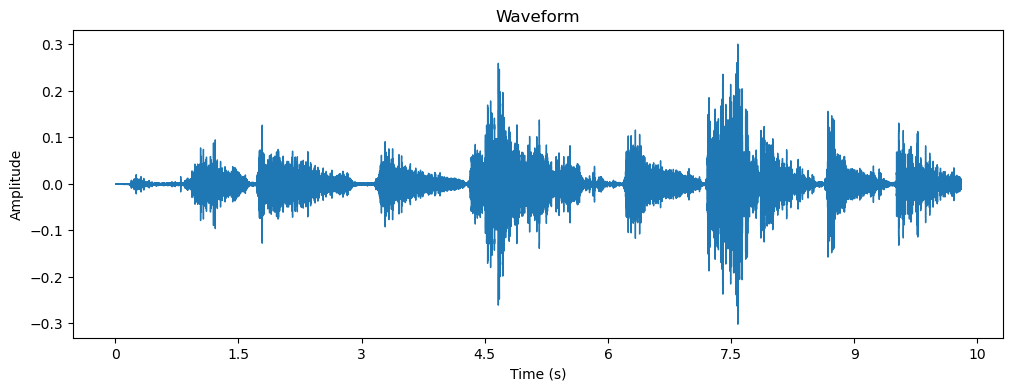

In [24]:
#| label: fig- original waveform
#| fig.cap: "Waveform of the audio"
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(' Original Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show



## MAKING FILTERED WAVEFORM

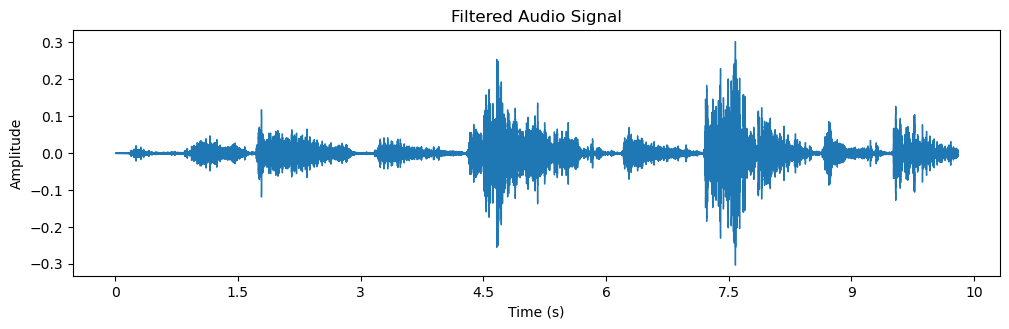

In [10]:
# Plot original and filtered signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_filtered, sr=sr)
plt.title('Filtered Audio Signal')

plt.tight_layout()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

## MAKING A SPECTOGRAM

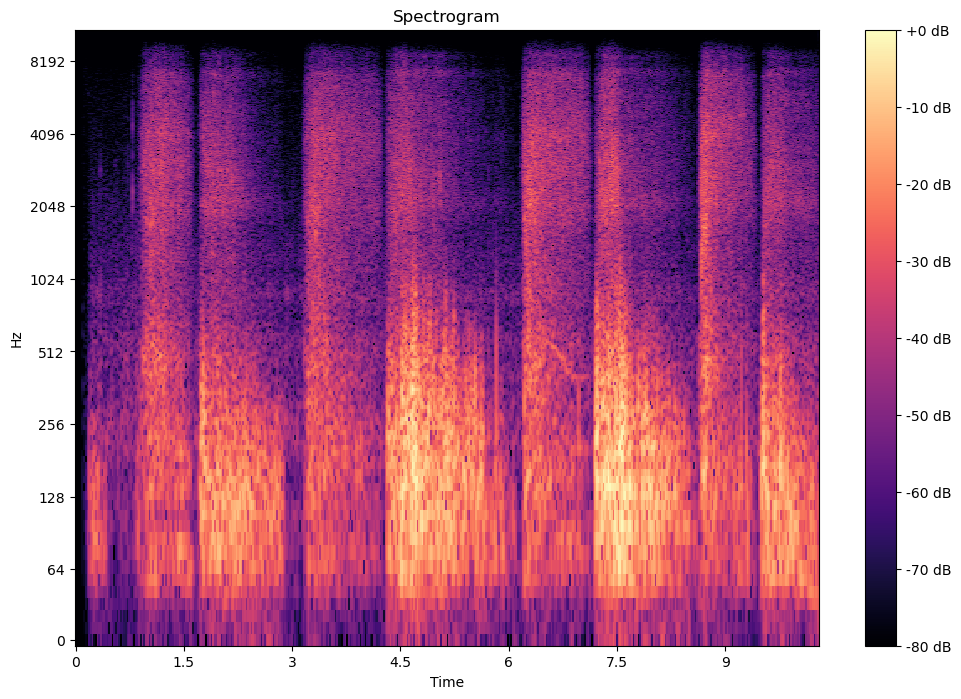

In [25]:
#| label: fig-spectogram
#| fig.cap: "Spectogram of the audio"
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 8))

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

## MAKING FILTERED SPECTOGRAM

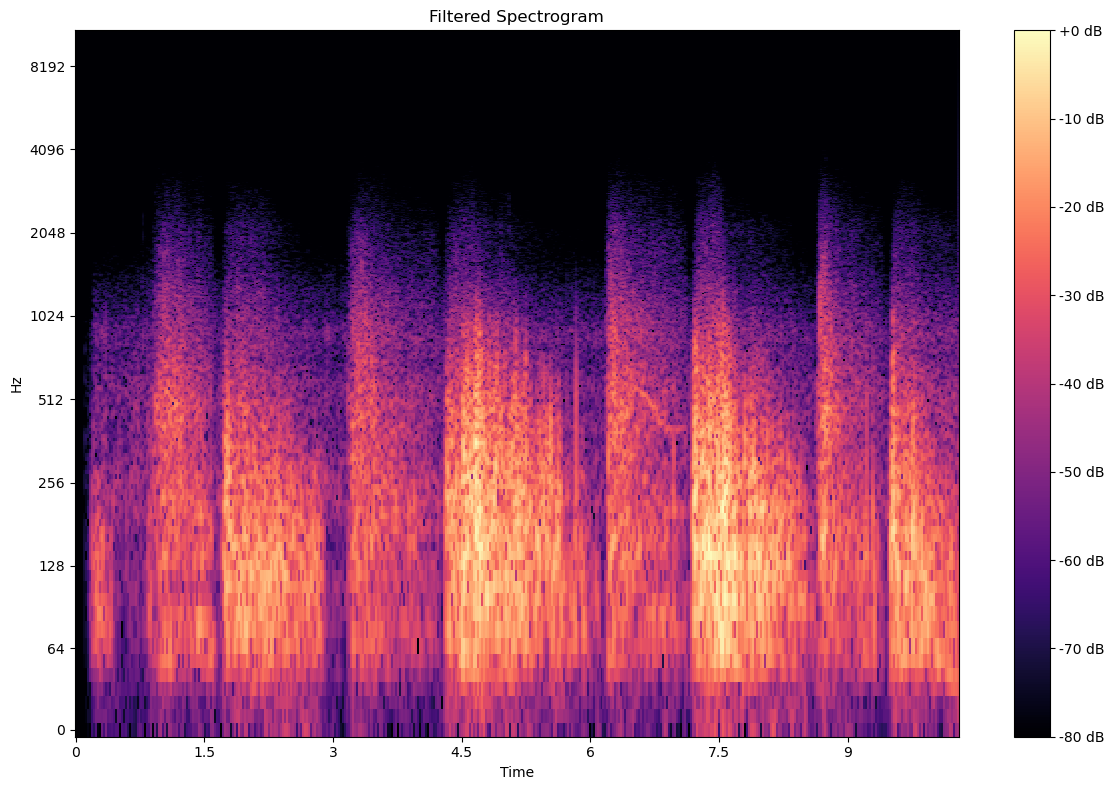

In [11]:
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(y_filtered)), ref=np.max)
plt.figure(figsize=(12, 8))
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Spectrogram')

plt.tight_layout()
plt.show()